In [2]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-euler-converge)

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$.

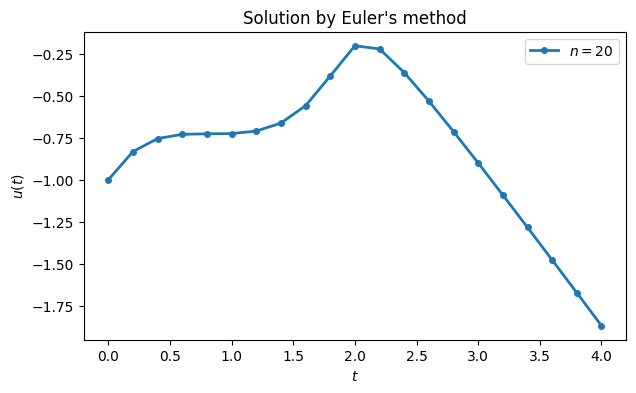

In [3]:
f = lambda t, u: sin((t + u) ** 2)
tspan = [0.0, 4.0]
u0 = -1.0
t, u = FNC.euler(f, tspan, u0, 20)

fig, ax = subplots()
ax.plot(t, u[0, :], "-o", label="$n=20$")
xlabel("$t$"), ylabel("$u(t)$")
title("Solution by Euler's method")
legend();

We could define a different interpolant to get a smoother picture above, but the derivation of Euler's method assumed a piecewise linear interpolant. We can instead request more steps to make the interpolant look smoother.

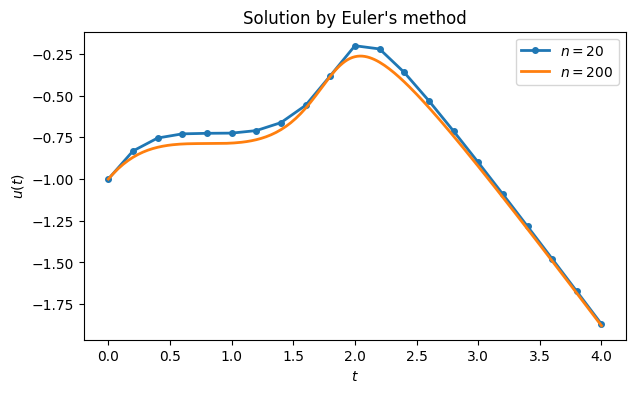

In [4]:
t, u = FNC.euler(f, tspan, u0, 200)
ax.plot(t, u[0, :], label="$n=200$")
ax.legend()
fig

Increasing $n$ changed the solution noticeably. Since we know that interpolants and finite differences become more accurate as $h\to 0$, we should anticipate the same behavior from Euler's method. We don't have an exact solution to compare to, so we will use `solve_ivp` to construct an accurate reference solution.

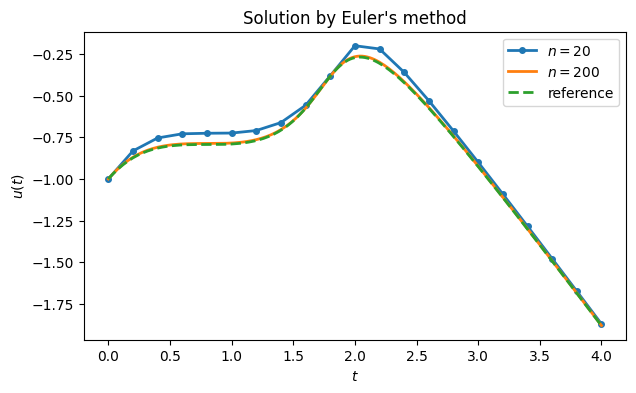

In [5]:
from scipy.integrate import solve_ivp
sol = solve_ivp(f, tspan, [u0], dense_output=True, atol=1e-8, rtol=1e-8)
ax.plot(t, sol.sol(t)[0, :], "--", label="reference")
ax.legend()
fig

Now we can perform a convergence study.

In [6]:
n = array([int(5 * 10**k) for k in arange(0, 3, 0.5)])
err = zeros(len(n))
results = PrettyTable(["n", "error"])
for k in range(len(n)):
    t, u = FNC.euler(f, tspan, u0, n[k])
    err[k] = norm(sol.sol(t)[0, :] - u[0, :], inf)
    results.add_row((n[k], err[k]))
print(results)

+------+-----------------------+
|  n   |         error         |
+------+-----------------------+
|  5   |   2.734204988403654   |
|  15  |  0.15019897709240698  |
|  50  |  0.02999619702005879  |
| 158  |  0.008850284724318591 |
| 500  | 0.0027366205261468157 |
| 1581 | 0.0008596857693601301 |
+------+-----------------------+


The error is approximately cut by a factor of 10 for each increase in $n$ by the same factor. A log-log plot also confirms first-order convergence. Keep in mind that since $h=(b-a)/n$, it follows that $O(h)=O(n^{-1})$.

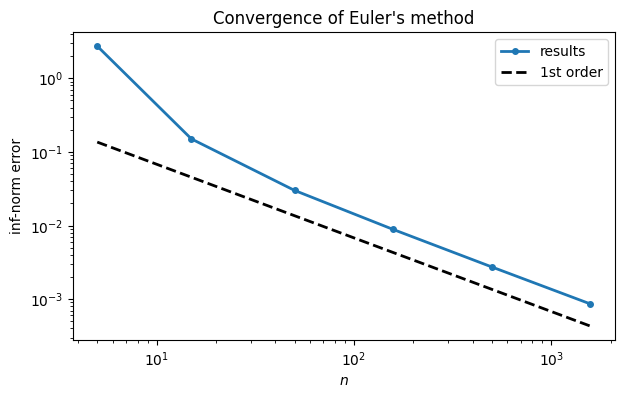

In [9]:
loglog(n, err, "-o", label="results")
plot(n, 0.5 * err[-1] * (n / n[-1])**(-1), "k--", label="1st order")
xlabel("$n$"), ylabel("inf-norm error")
title("Convergence of Euler's method")
legend();